#To Predict the amount -> Regression
From taxi fare dataset, taxi fare is dependent variable.

sarey concepts karney hain jese - data_visualization ke sarey plots ke concepts aur baki ML model ke sarey concepts karney hain.

# here, unique id is not required --> drop that column
## amount is Dependent variable
## amount is in numerical formate so we are using regression model.
## these models are -
* linear Reg,
* Decision Tree Reg,
* Bagging Reg,
* Adaboost Reg,
* Gradient Boost reg,
* Random forest Reg. in this project

## we also use DATA VISUALIZATION techniques like :-
* all plots

# Step 1 --> Importing basic & imp. Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Step 2 --> Loading DATASET

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets-main/TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Step 3 --> Explore shape, dtypes, info, null values status, description & concept of visualization of dataset

* sath hi jo column kaam ke nahi hain unhe DROP kar dena hai

In [ ]:
df.drop(['unique_id','date_time_of_pickup'], axis=1, inplace=True)
df

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2


In [ ]:
df.shape

(50000, 6)

In [ ]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.describe(include='all')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


<function matplotlib.pyplot.show(close=None, block=None)>

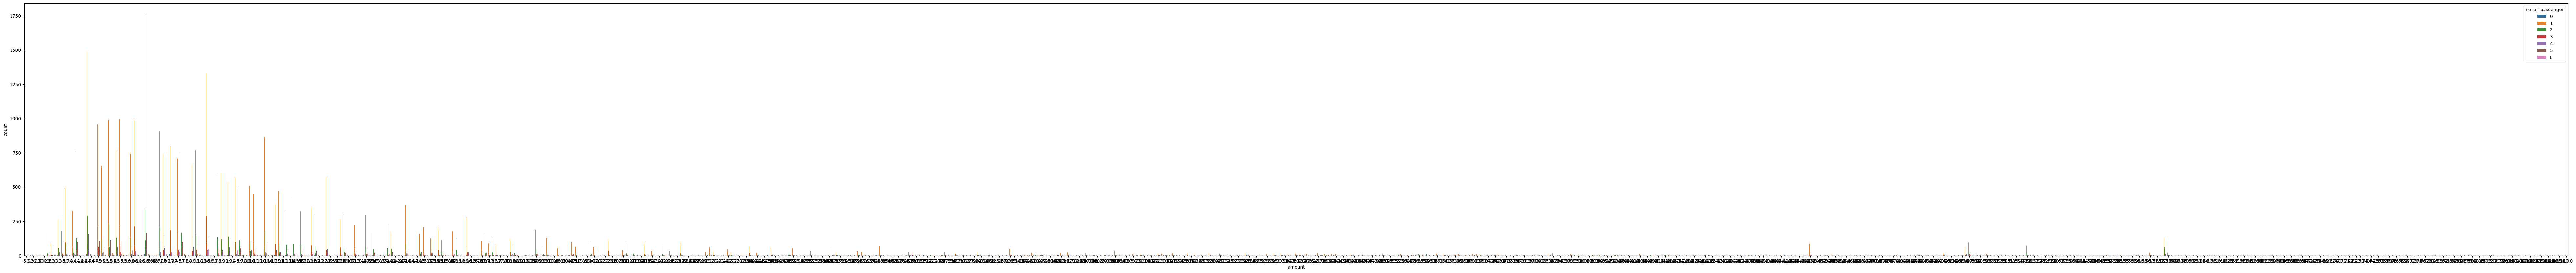

In [ ]:
import seaborn as sns
plt.figure(figsize=(100,10))
sns.countplot(x='amount',hue='no_of_passenger',data=df)
plt.show

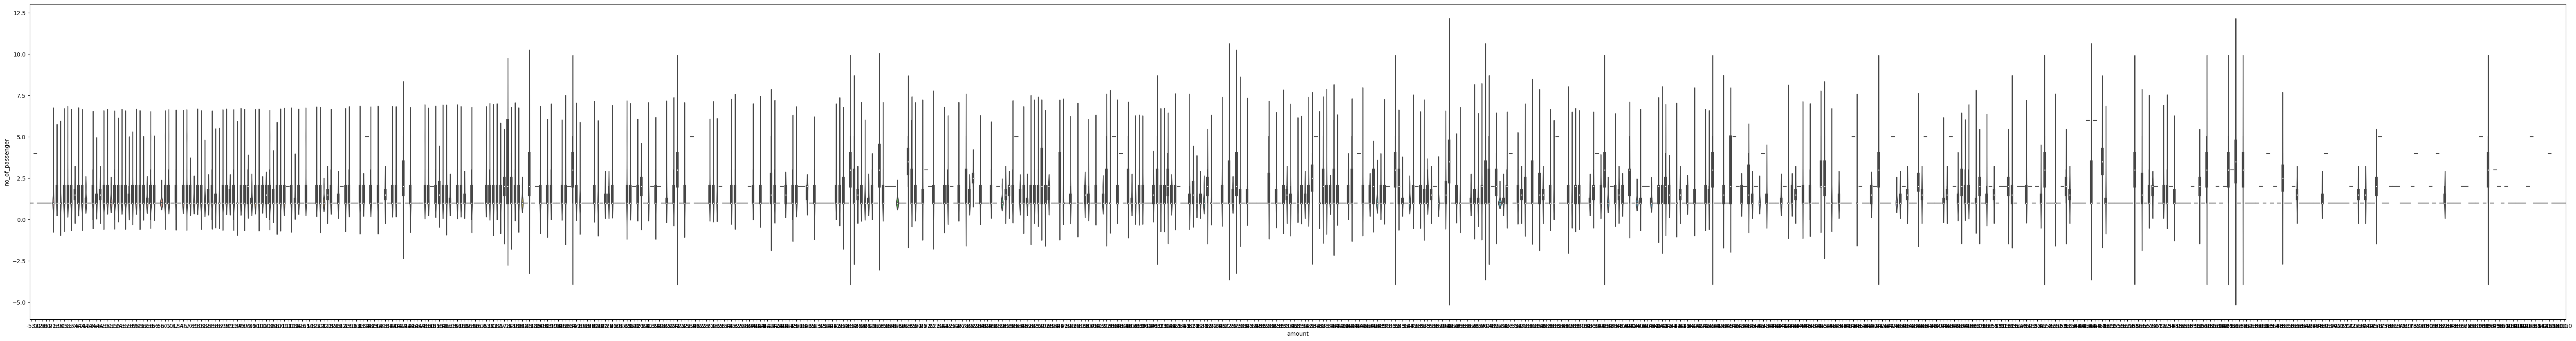

In [ ]:
plt.figure(figsize=(80,10))
sns.violinplot(x='amount',y='no_of_passenger',data=df)
plt.show()

<Axes: >

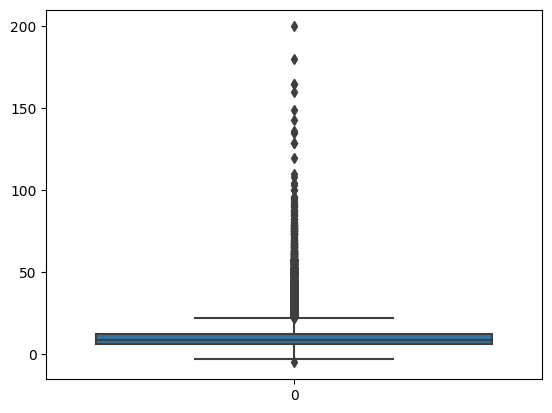

In [ ]:
sns.boxplot(df['amount'])

# Step 4 --> Prepare data for model training i.e., removing outliers, fill null values etc.

In [ ]:
q1=6
q3=12.5
iqr=q3-q1
iqr

6.5

In [ ]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

print(lower_limit)

print(upper_limit)

-3.75
22.25


In [ ]:
df=df[(df["amount"]>=lower_limit)&(df["amount"]<=upper_limit)]

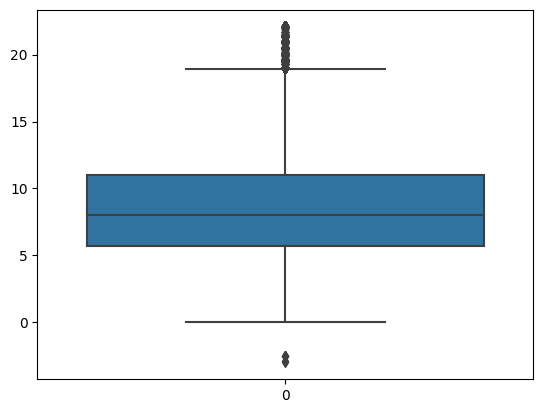

In [ ]:
sns.boxplot(df["amount"])
plt.show()

# Step 5 --> Encoding the categorical data/columns

ab hamare dataset mein koi bhi null value nahi hai to ***THERE IS NO NEED OF ENCODING***

# Step 6 --> Split x,y into train & test data --> fit datat into desired model --> check the score of model (train & test)

In [ ]:
y=df[['amount']]
x=df.drop(['amount'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model_lnr = LinearRegression()
model_lnr.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model_lnr.score(x_train,y_train))
print(model_lnr.score(x_test,y_test))

0.0005999296845686786
0.0002768178192832371


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=5,random_state=0)
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [ ]:
print(model_dtr.score(x_train,y_train))
print(model_dtr.score(x_test,y_test))

0.24764724208981925
0.22956230125095756


In [ ]:
from sklearn.ensemble import BaggingRegressor
model_br = BaggingRegressor(n_estimators=10,random_state=0)
model_br.fit(x_train,y_train)

BaggingRegressor(random_state=0)

In [ ]:
print(model_br.score(x_train,y_train))
print(model_br.score(x_test,y_test))

0.9237766128860827
0.6507051323561603


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_abr = AdaBoostRegressor(n_estimators=150, base_estimator=model_dtr)
model_abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                       random_state=0),
                  n_estimators=150)

In [ ]:
print(model_br.score(x_train,y_train))
print(model_br.score(x_test,y_test))

0.9237766128860827
0.6507051323561603


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor(n_estimators=200,random_state=0)
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [ ]:
print(model_br.score(x_train,y_train))
print(model_br.score(x_test,y_test))

0.9237766128860827
0.6507051323561603


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=100,random_state=0)
model_rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
print(model_rfr.score(x_train,y_train))
print(model_rfr.score(x_test,y_test))

0.9414409272300612
0.6780966117655949
